## Comparison of rule- and ordinary differential equation-based dynamic model of DARPP-32 signalling network

##### Authors: Emilia M. Wysocka, Matthew Page, James Snowden, T. Ian Simpson 


Code for figure reproduction.

In [21]:
import re
import numpy as np
import copy
import sys, os
sys.path.append(os.path.join(sys.path[0], "pytoolbox"))
import pandas as pd
import basic_tools as bt
import comparison_timeseries_toolkit as ctt
import count_species as cs
import count_inits as ci

In [2]:
from platform import python_version
print(python_version())

2.7.18


----
### Input paths (run this cell)

In [25]:
rb_wt = os.path.join("rb_model","wildType")
rb_const = os.path.join("rb_model","constitutiveSer137p")
rb_ser2ala = os.path.join("rb_model","Ser137Ala")

ode_wt = os.path.join("ode_model","withCopasiGUI_SE", "ODEresults")
ode_mut = os.path.join("ode_model","withCopasiGUI_SE", "ODEresults_mutants")

-----
### Output paths (run this cell)

In [4]:
pathout = "figures"

---
### Count number of rules

In [ ]:
rulefile = os.path.join(rb_wt, "models", "oneBindingSite_DARPP","oBS_FINALrules_thr75inhibition_PKArulesDiff.ka")

with open(rulefile) as f:
    readl = f.readlines()

ratespart = [l.split('@ ')[-1] for l in readl if not re.match('^#', l)]

#### Number of rule lines:

In [ ]:
len(ratespart)

#### Number of rules calculated by nonunique number of rates:

In [ ]:
ratespart2 = [l.rstrip('\n').split(',') for l in ratespart]
ratesNo = [p for l in ratespart2 for p in l]

len(ratesNo)

##### Number of reversible rules:

In [ ]:
countRev = [1 for l in ratespart2 if len(l) > 1]
len(countRev)

----
### Get unique species containing an agent of choice from snapshots:

In [23]:
## FOR tBS:
snapfilest = os.path.join( rb_wt, "snapshots_threeBindingSites_DARPP","snapshots_0-700_E10000")
## FOR oBS:
snapfileso = os.path.join( rb_wt, "snapshots_oneBindingSite_DARPP", "snapshots_0-700_E10000")
snappattern = "s_*"

In [14]:
### in three-binding site / in one binding site 
tbs = cs.get_uniqueSnapshotSpecies(snapfilest, snappattern)
obs = cs.get_uniqueSnapshotSpecies(snapfileso, snappattern)

In [17]:
len(tbs)

135

In [16]:
len(obs)

91

In [24]:
## Get all Ca2+:
ca2o = cs.get_allComplexesWith(snapfileso, snappattern, 'Ca2+') 
len(ca2o)

24

In [27]:
campo = cs.get_allComplexesWith(snapfileso, snappattern, 'cAMP') 
len(campo)

22

In [29]:
darppo = cs.get_allComplexesWith(snapfileso, snappattern, 'ser137')
len(darppo)

44

In [31]:
## Get all Ca2+:
ca2t = cs.get_allComplexesWith(snapfilest, snappattern, 'Ca2+') 
len(ca2t)

43

In [32]:
campt = cs.get_allComplexesWith(snapfilest, snappattern, 'cAMP')
len(campt)

22

In [34]:
darppt = cs.get_allComplexesWith(snapfilest, snappattern, 'ser137')
len(darppt)

88

### Generate observables from a species set

In [ ]:
## speciesSet_2_obs(ca2, "c2+_")
## speciesSet_2_obs(camp, "camp_")

## speciesSet_2_obs(tbs, "tBS_allsnapshotspecies_")
## speciesSet_2_obs(obs, "oBS_allsnapshotspecies_")

----
## Figure 3

#### (A): ODE W-T deterministic trajectories

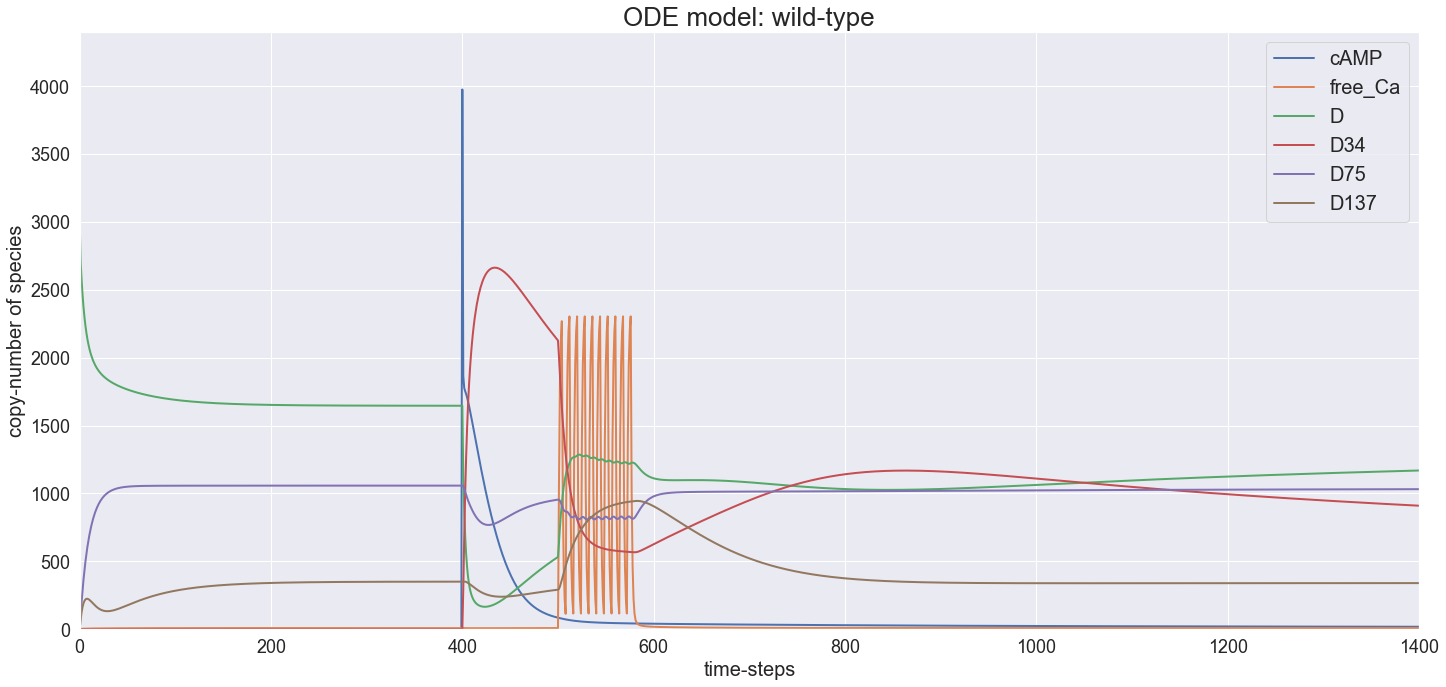

In [90]:
outfile = os.path.join( ode_wt, "tc_LSODA_700_1400.txt")
prefix = ''
name = "wild-type"
ctt.plot_originalSelected_as_paper(outfile, pathout, name, prefix)

#### (B): ODE W-T stochastic trajectories

Ensemble of 40-model runs

Files saved in ode_model/withCopasiGUI_SE/DirMethresults/ensemble_out


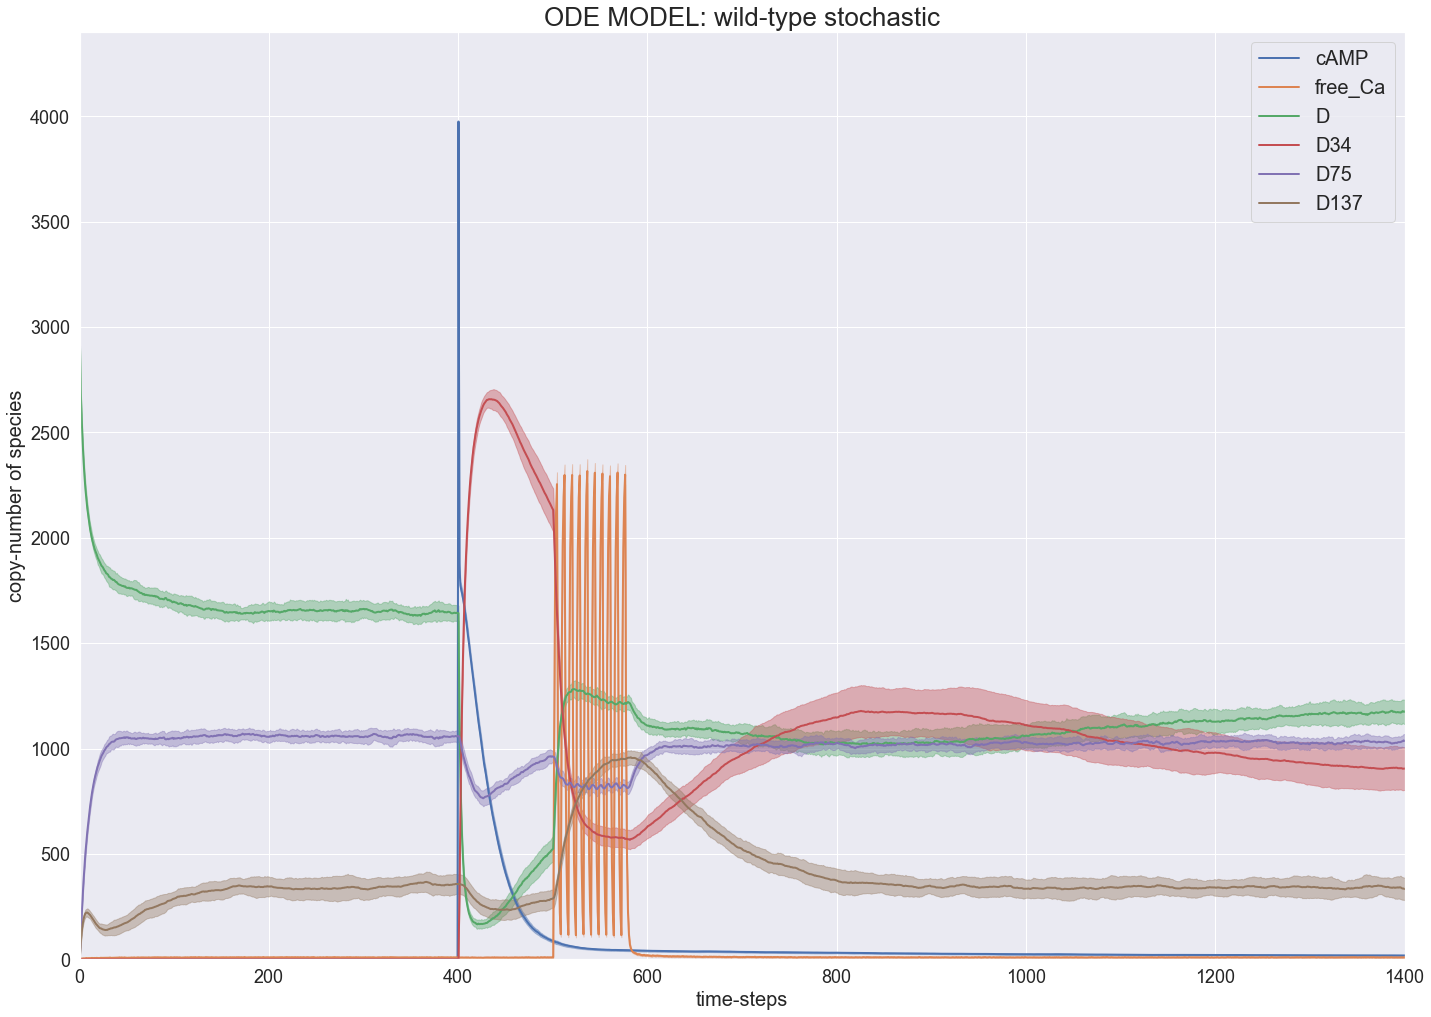

In [5]:
ode_wt_ens = os.path.join("ode_model","withCopasiGUI_SE","DirMethresults")
ensembleODEfile = os.path.join(ode_wt_ens, "ensemble_40runs_tc_directmethod700_1400")
ensembleODEfolder = os.path.join(ode_wt_ens, "ensemble_out")
name = "wild-type"
prefix = "stochastic"

ctt.plot_originalSelected_as_paper_SD(ensembleODEfile, ensembleODEfolder, name, prefix, pathout)

#### (C): RB W-T stochastic trajectories

Ensemble of 40-model runs

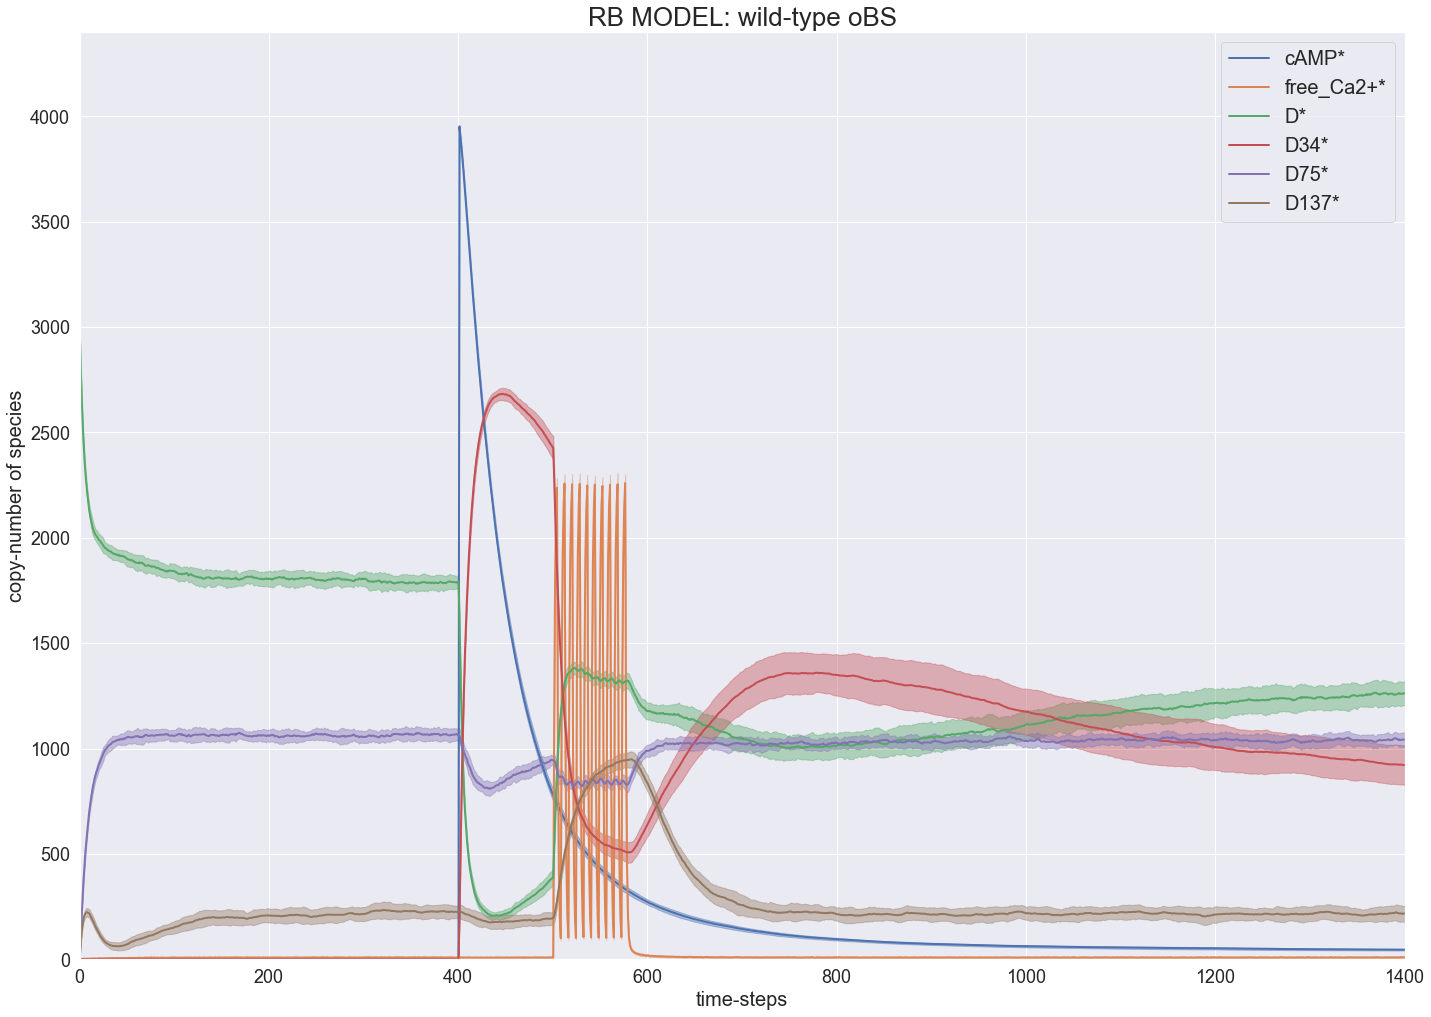

In [11]:
name = "wild-type"
prefix = "oBS"

ensembleRBfolder = os.path.join(rb_wt , "models", "oneBindingSite_DARPP", "out_ensemble")
filepattern = "data_*.out"

ctt.plot_mineSelected_as_paper_SD(ensembleRBfolder, filepattern, name, prefix, pathout)

### Figure 4

RB to ODE stochastic W-T

Files saved in ode_model/withCopasiGUI_SE/DirMethresults/ensemble_out


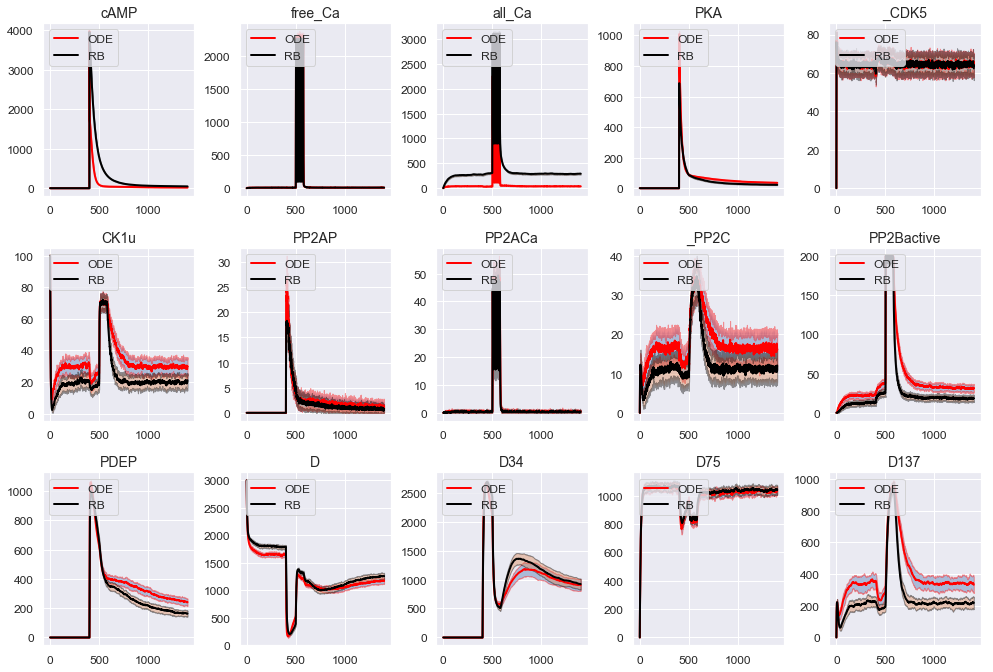

In [23]:
name = "w-t_ode2rb"
prefix = "stoch2stoch"

ensembleRBfolder = os.path.join(rb_wt , "models", "oneBindingSite_DARPP", "out_ensemble")
pattern = "data_*.out"

ensembleODEfile = os.path.join(ode_wt_ens, "ensemble_40runs_tc_directmethod700_1400")
ensembleODEfolder = os.path.join(ode_wt_ens, "ensemble_out")

legendlabels = ['ODE','RB']

ctt.plot_overlaid_ode2rb_SD(ensembleRBfolder,
                            pattern,
                            ensembleODEfile,
                            ensembleODEfolder,
                            name,
                            prefix,
                            pathout,
                            legendlabels,
                            paired=True, 
                            format="landscape")


-----
## Data preparation for the Ca2+ part of analysis ( run this cell )

In [39]:
legendlabels = ["ODE","RB"]

### RB model ---------------
ensembleRB = "./rb_model/wildType/models/threeBindingSites_DARPP/out_ensemble_ca_all"
pattern = "data_*"

rbdicarr, rbcols =  prepare_ensemble_rb_models(ensembleRB, pattern, defcols = False)

### ODE model stochastic ----------------
ensembleODE = "./ode_model/withCopasiGUI_SE/DirMethresults/ensemble_40runs_tc_directmethod700_1400"
ensemblefolder = "./ode_model/withCopasiGUI_SE/DirMethresults/ensemble_out"

patternslist = ['Ca']

separate_caall = ctt.get_ode_obstocomparewith(ensembleODE, patternslist)
separate_caall_2 = ['^'+ c +'$' for c in separate_caall]

odedicarr, odecols = ctt.prepare_ensemble_ode_models(ensembleODE, 
                                                     ensemblefolder, 
                                                     defcols = False,
                                                     obstocomparewith = separate_caall_2)

Files saved in ./ode_model/withCopasiGUI_SE/DirMethresults/ensemble_out


----
## Figure 6

### (B)

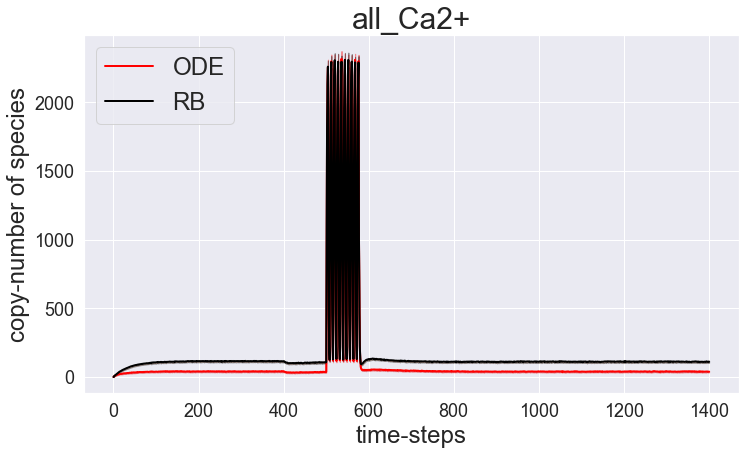

In [45]:
name = "all_ca_rb_18_ode_13"

rbtosumall = [val for val in rbdicarr.itervalues()]
rbtosumall2 = reduce(np.add, rbtosumall)
rbcolssummed = "all_Ca*"

rbdicSum = {rbcolssummed:rbtosumall2}

odetosumall = [val for val in odedicarr.itervalues()]
odetosumall2 = reduce(np.add, odetosumall)
odecolssummed = "all_Ca2+"

odedicSum = {odecolssummed:odetosumall2}

ctt.plot_paired_separate_SD(odedicSum, [odecolssummed], rbdicSum, [rbcolssummed], 
                            foldername = pathout, 
                            name = name,
                            legendlabels=legendlabels)

### (C)

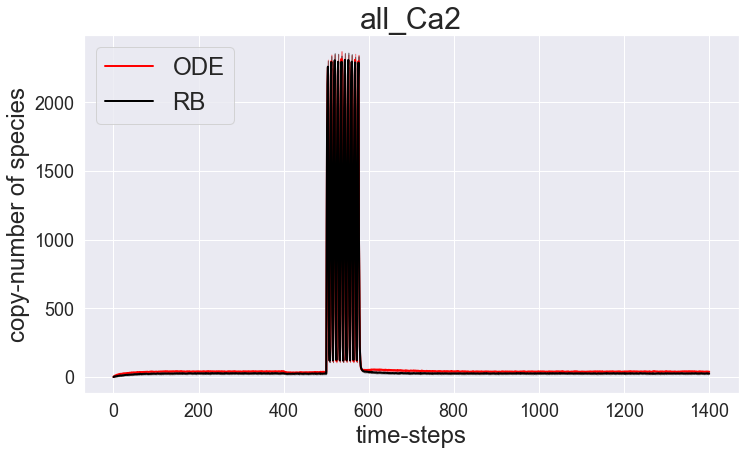

In [46]:
name = "all_ca_summed_first_instance_of_PP2B"
rbcols2 = rbcols[:13]
rbdicarr2 = {key: rbdicarr[key] for key in rbcols2}

rbtosumall = [val for val in rbdicarr2.itervalues()]
rbtosumall2 = reduce(np.add, rbtosumall)
rbcolssummed = "all_Ca*"

rbdicSum = {rbcolssummed:rbtosumall2}

odetosumall = [val for val in odedicarr.itervalues()]
odetosumall2 = reduce(np.add, odetosumall)
odecolssummed = "all_Ca2"

odedicSum = {odecolssummed:odetosumall2}

ctt.plot_paired_separate_SD(odedicSum, [odecolssummed], rbdicSum, [rbcolssummed], 
                            foldername = pathout, 
                            name = name, 
                            legendlabels=legendlabels)


----
## Figure 7

Paired all_Ca with the summed all instances of PP2B.

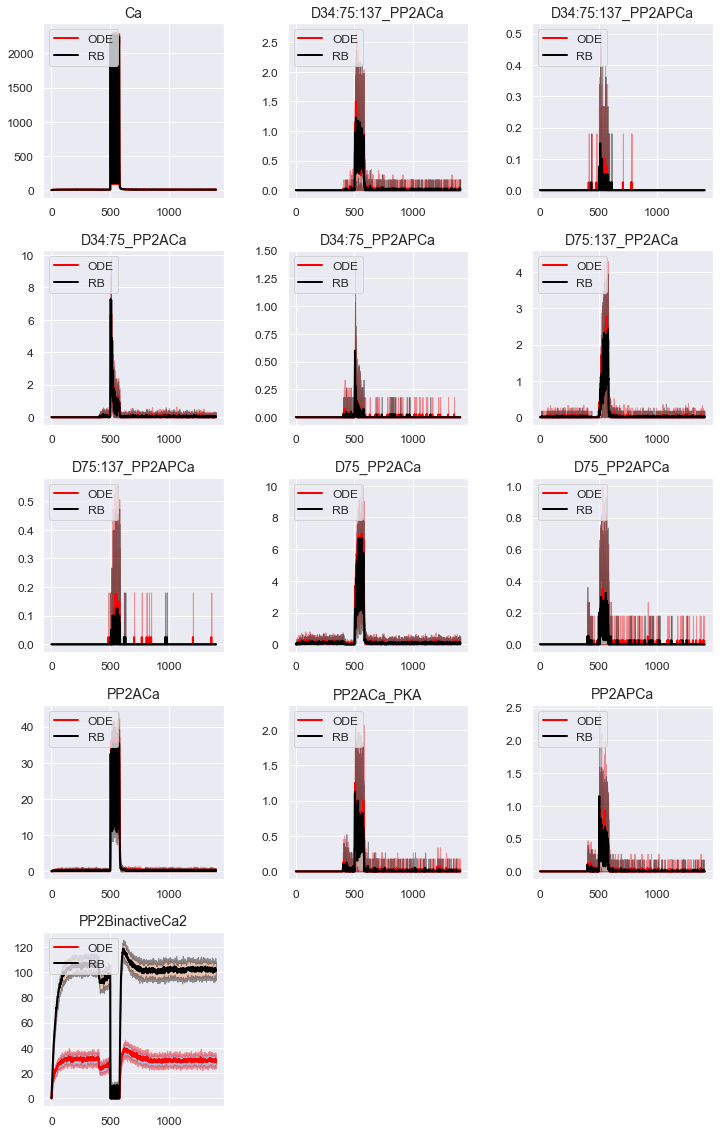

In [44]:
## make deep copy of rbdicarr:
rbdicarrCopy = copy.deepcopy(rbdicarr)
rbcolsCopy = copy.copy(rbcols)

name = "all_Ca_summed_PP2B"
tosumovercols = ['PP2BinactiveCa2_1*', 'PP2BinactiveCa2_2*', 'PP2BinactiveCa2_3*', 'PP2BinactiveCa2_4*', 'PP2BinactiveCa2_5*', 'PP2BinactiveCa2_6*']

tosumover = [val for key,val in rbdicarr.iteritems() if key in tosumovercols]
[rbdicarrCopy.pop(i, None) for i in tosumovercols]
summed = reduce(np.add, tosumover)

rbdicarrCopy['PP2BinactiveCa2_all*'] = summed
rbcolsCopy = sorted(list(rbdicarrCopy.keys()))

ctt.plot_paired_SD(odedicarr, odecols, rbdicarrCopy, rbcolsCopy, 
               foldername = pathout, 
               name = name, 
               legendlabels=legendlabels,
               format='portrait', 
               ii=3, jj=5)

## name='sep'
## ctt.plot_paired_separate_SD(odedicarr, odecols, rbdicarrCopy, rbcolsCopy, foldername = foldername+"/separate", name = name, legendlabels=legendlabels)


----
## Figure 8

### (A) ODE Constitutive Serine 

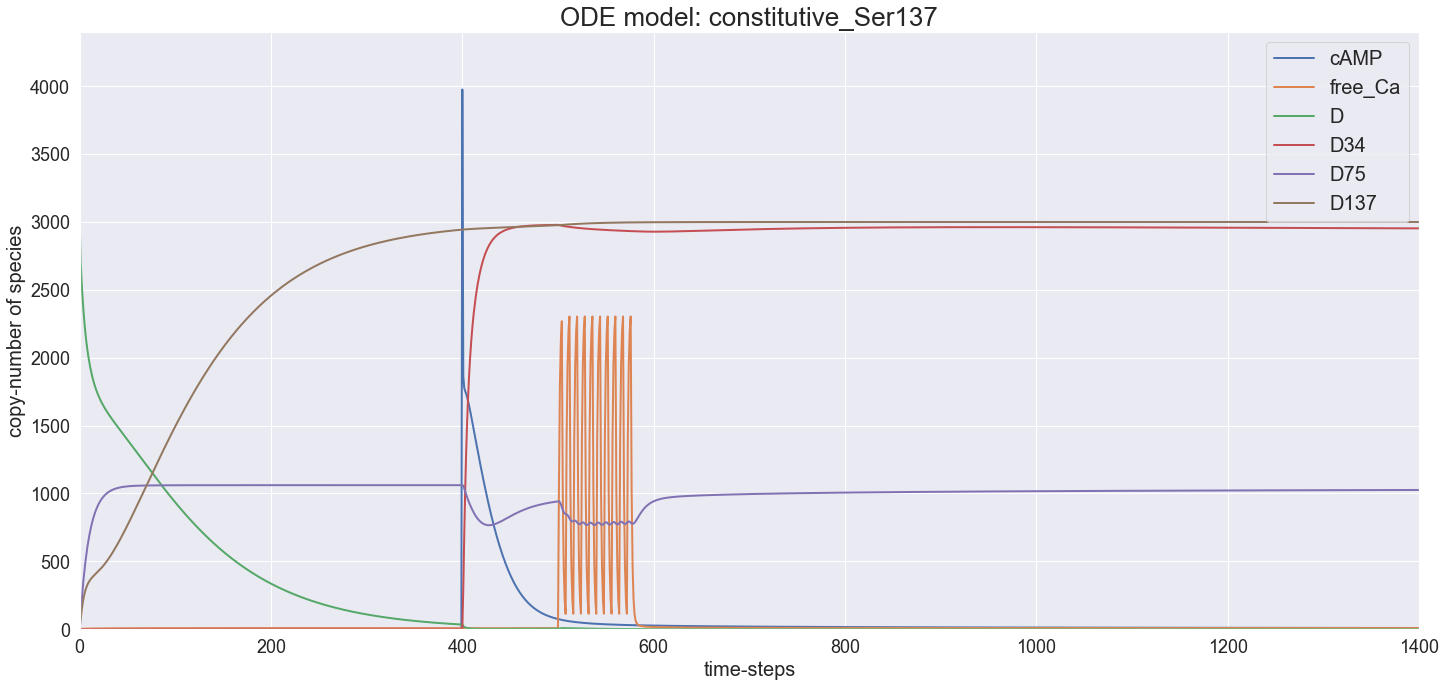

In [27]:
outfile = os.path.join(ode_mut, "constSer_tc_LSODA_700_1400.txt")
name = "constitutive_Ser137"
prefix = ''

ctt.plot_originalSelected_as_paper(outfile, pathout, name, prefix)

### (B) RB Constitutie Serine

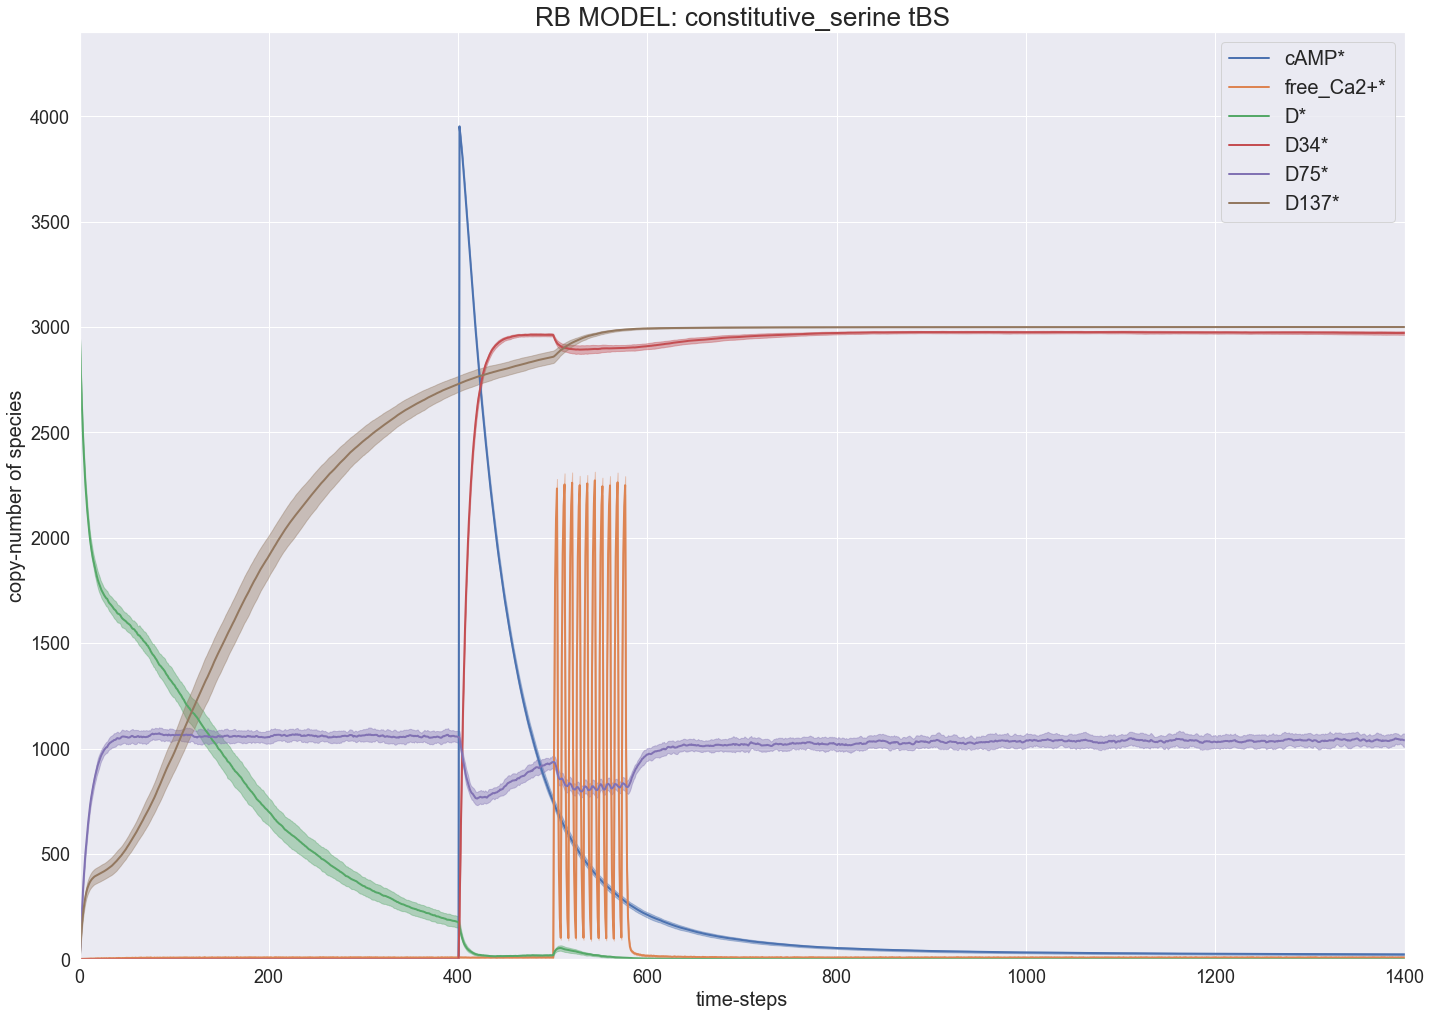

In [32]:
name = "constitutive_serine"
prefix = "tBS"
ensembleRBfolder = os.path.join(rb_const, "threeBindingSites_DARPP", "out_ensemble")
filepattern = "data_*.out"

plot_mineSelected_as_paper_SD(ensembleRBfolder, filepattern, name, prefix, pathout)

### (C) ODE Serine 137 to Alanine

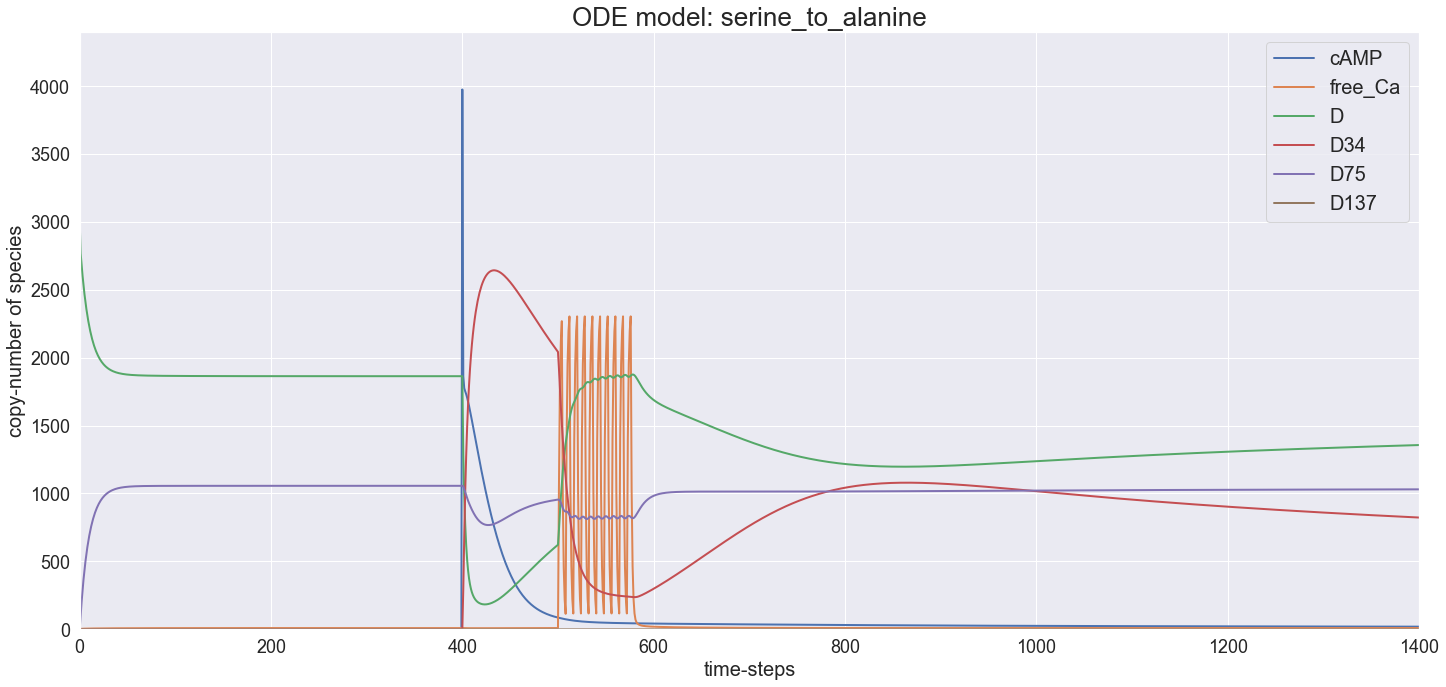

In [34]:
outfile = os.path.join(ode_mut, "ser2Ala_tc_LSODA_700_1400.txt")
name = "serine_to_alanine"
prefix = ''

ctt.plot_originalSelected_as_paper(outfile, pathout, name, prefix)

### (D) RB  Serine 137 to Alanine

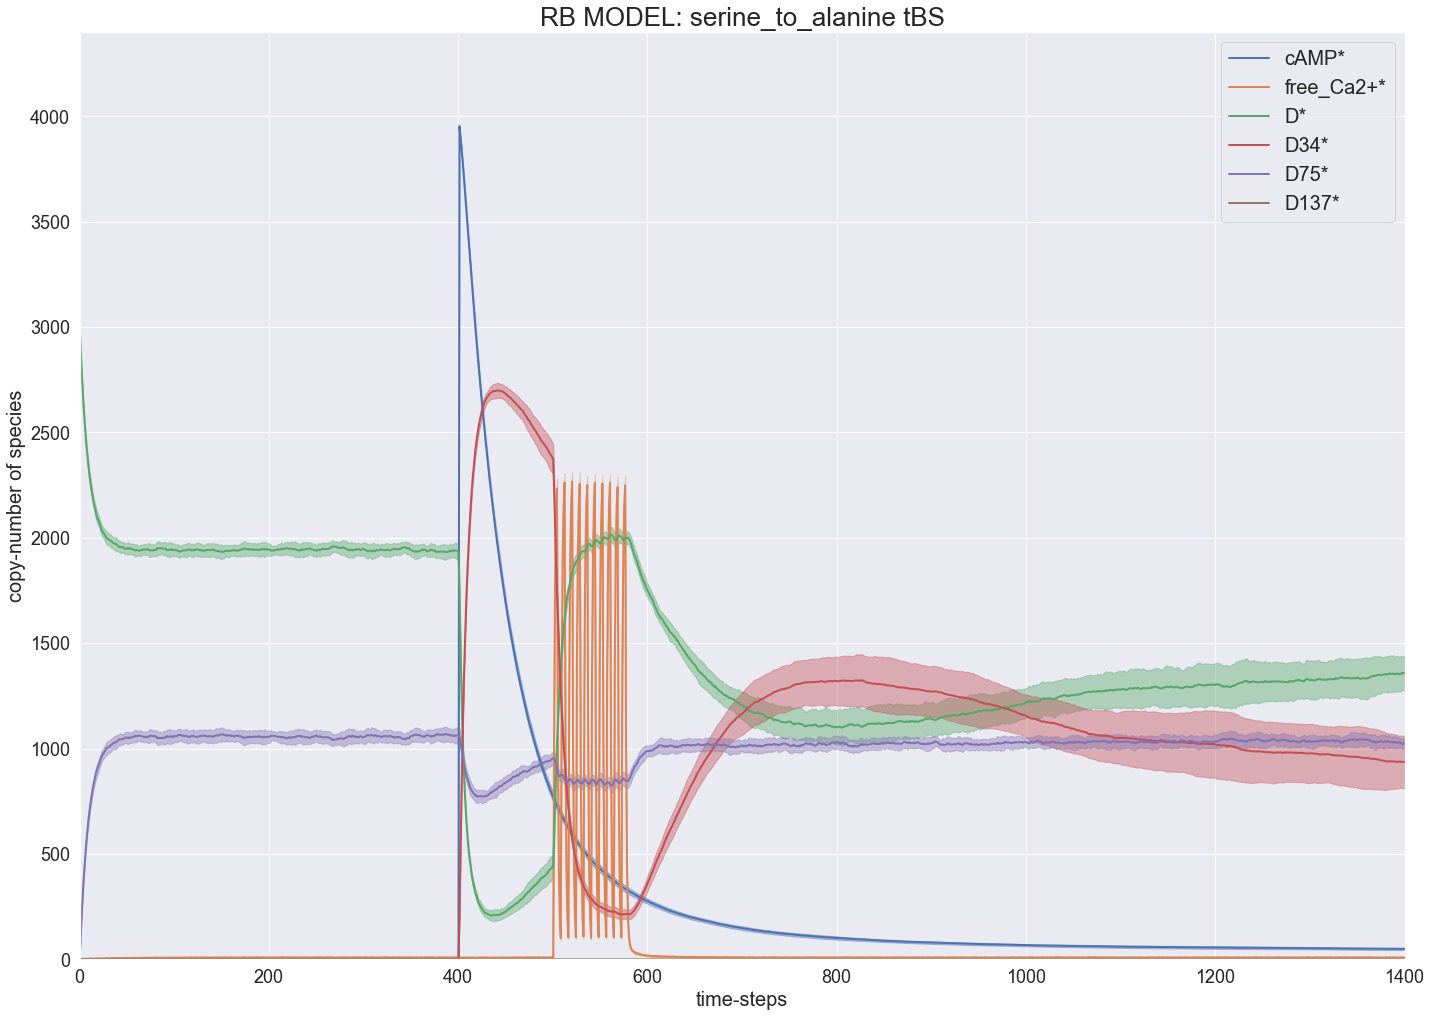

In [36]:
name = "serine_to_alanine"
prefix = "tBS"
ensembleRBfolder = os.path.join(rb_ser2ala, "threeBindingSites_DARPP", "out_ensemble")
filepattern = "data_*.out"

ctt.plot_mineSelected_as_paper_SD(ensembleRBfolder, filepattern, name, prefix, pathout)

----
## Figure S1

In [53]:
name = "all_Ca_summed_PP2B"
toselectcols = ('PP2BinactiveCa2_1*', 
                'PP2BinactiveCa2_2*',
                'PP2BinactiveCa2_3*', 
                'PP2BinactiveCa2_4*', 
                'PP2BinactiveCa2_5*', 
                'PP2BinactiveCa2_6*')

pp2bin = {key: value for key, value in rbdicarr.items() if key in toselectcols}

In [69]:
pp2binM = {}
for kk in pp2bin.iterkeys():
    pp2binM[kk] = np.mean(pp2bin[kk], axis=0)

In [71]:
pp2binDf = pd.DataFrame(pp2binM)

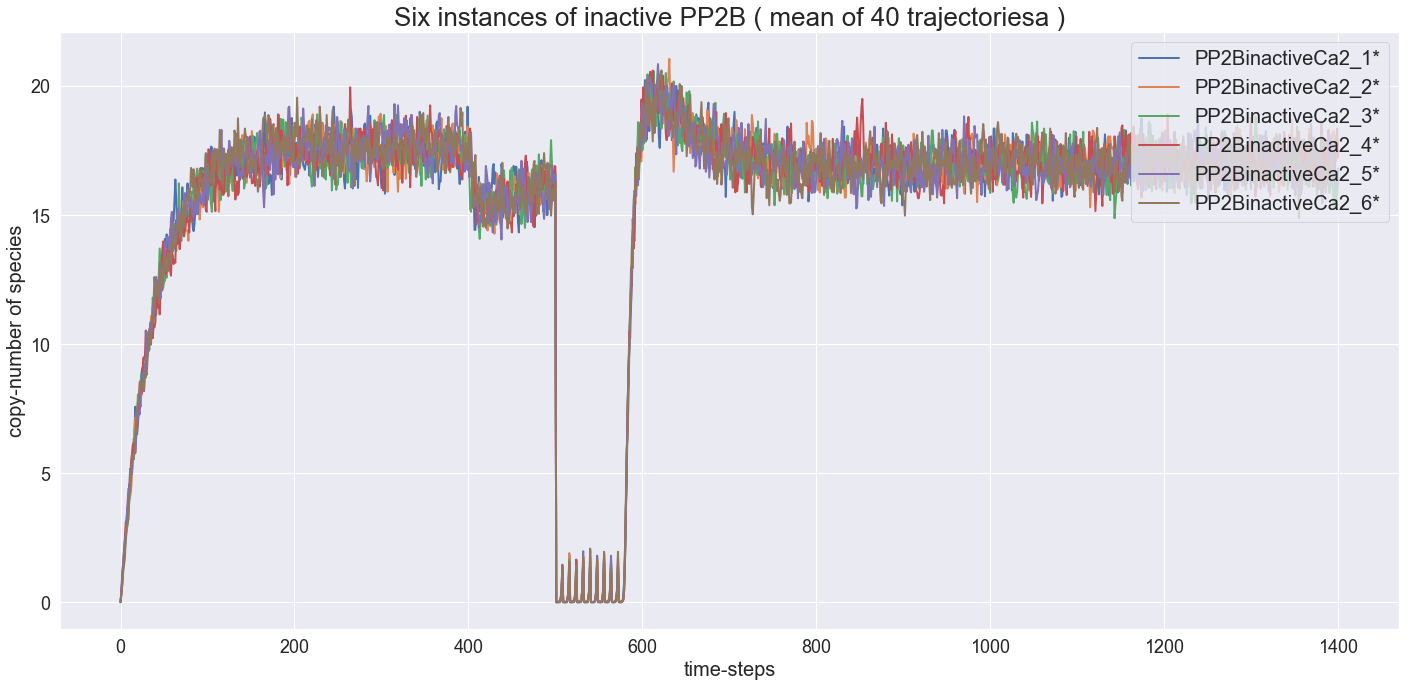

In [76]:
bt.plot_df(dftoplot=pp2binDf, 
           plottitle="Six instances of inactive PP2B ( mean of 40 trajectoriesa )",
           figfilename="figures/CaRates_15_1_7_CaStim_6_representations_of_PP2Bi.pdf")

----
## Figure S2

Paired all_Ca with only the first instance of PP2B.

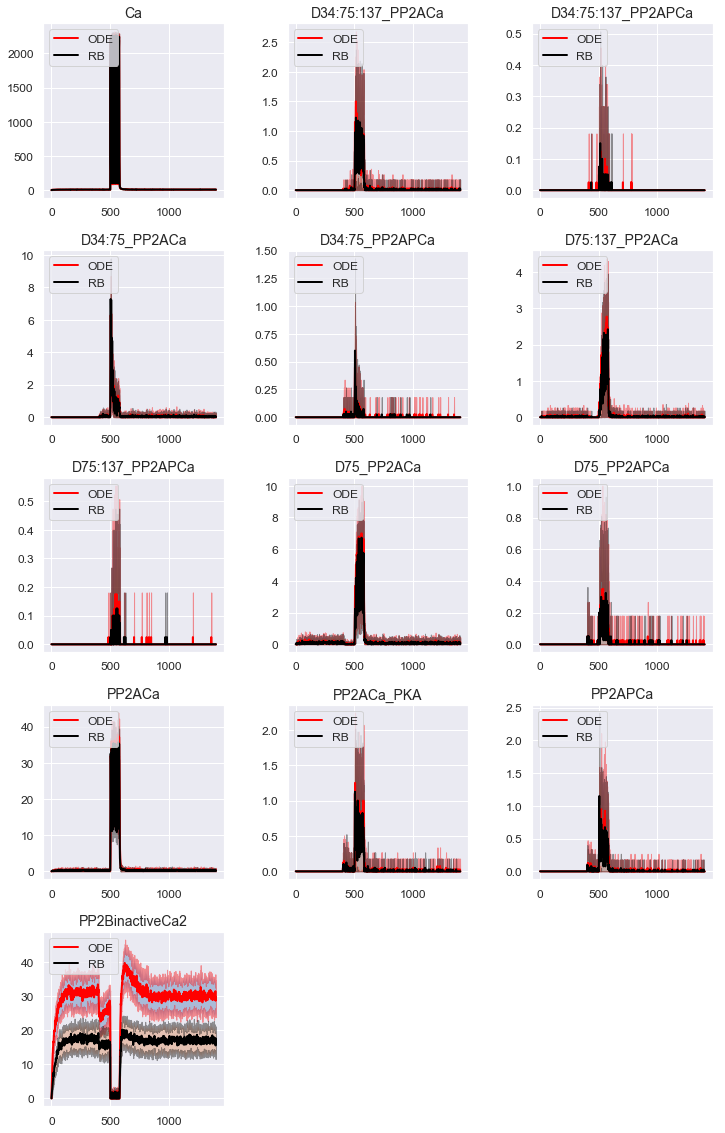

In [43]:
name = "all_Ca"

ctt.plot_paired_SD(odedicarr, odecols, rbdicarr, rbcols, 
               foldername = pathout, 
               name = name, 
               legendlabels = legendlabels,
               format='portrait', 
               ii=3, jj=5)

----
## Figure S3
RB W-T tBS to RB W-T oBS

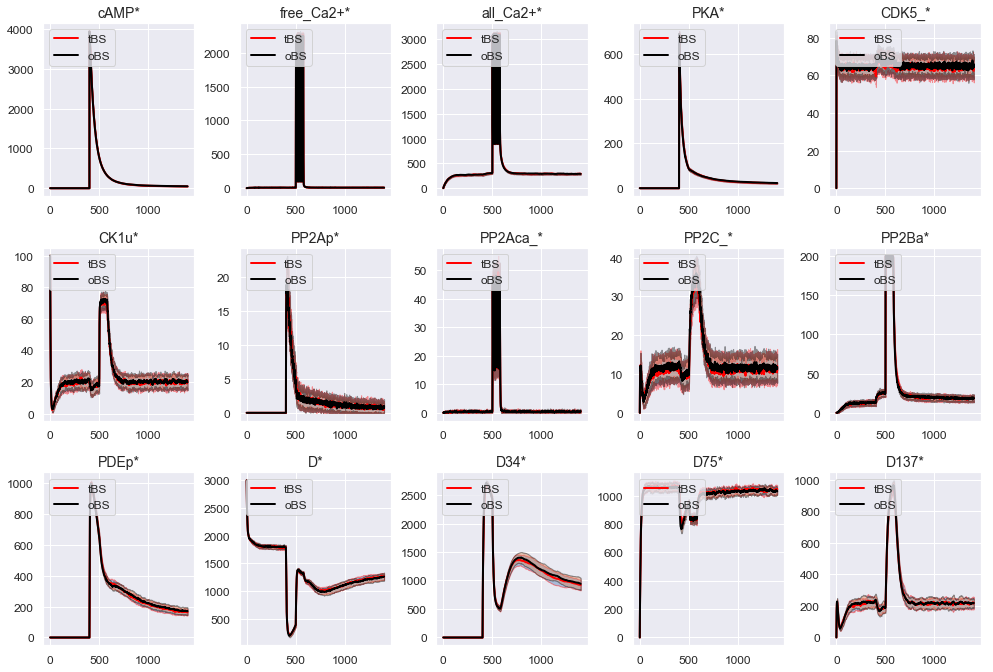

In [24]:
name = "w-t_rb2rb"
prefix = "stoch2stoch"
pattern = "data_*.out"

ensemblefolder_t = os.path.join(rb_wt , "models", "oneBindingSite_DARPP", "out_ensemble")
ensemblefolder_o =  os.path.join(rb_wt , "models", "threeBindingSites_DARPP", "out_ensemble")

legendlabels = ['tBS','oBS']

plot_overlaid_rb2rb_SD(ensemblefolder_t,
                       ensemblefolder_o,
                       pattern,
                       name,
                       prefix,
                       pathout,
                       legendlabels,
                       paired=True, 
                       format="landscape")

----
## Figure S4

#### (A): Compares the total number of produced species over time between three-binding and one-binding DARPP-32 Kappa models.

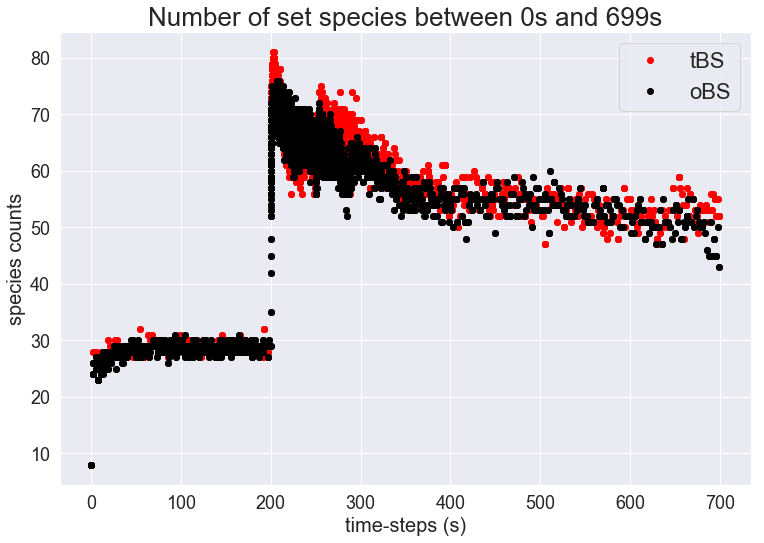

In [78]:
ft = os.path.join(snapfilest, snappattern )
fo = os.path.join(snapfileso, snappattern)
ci.count_speciesNum2(pathtofiles=ft, 
                     pathtofiles2=fo, 
                     legendlabels=["tBS", "oBS"],
                     pathout=pathout)

#### (B): Plot stimuli

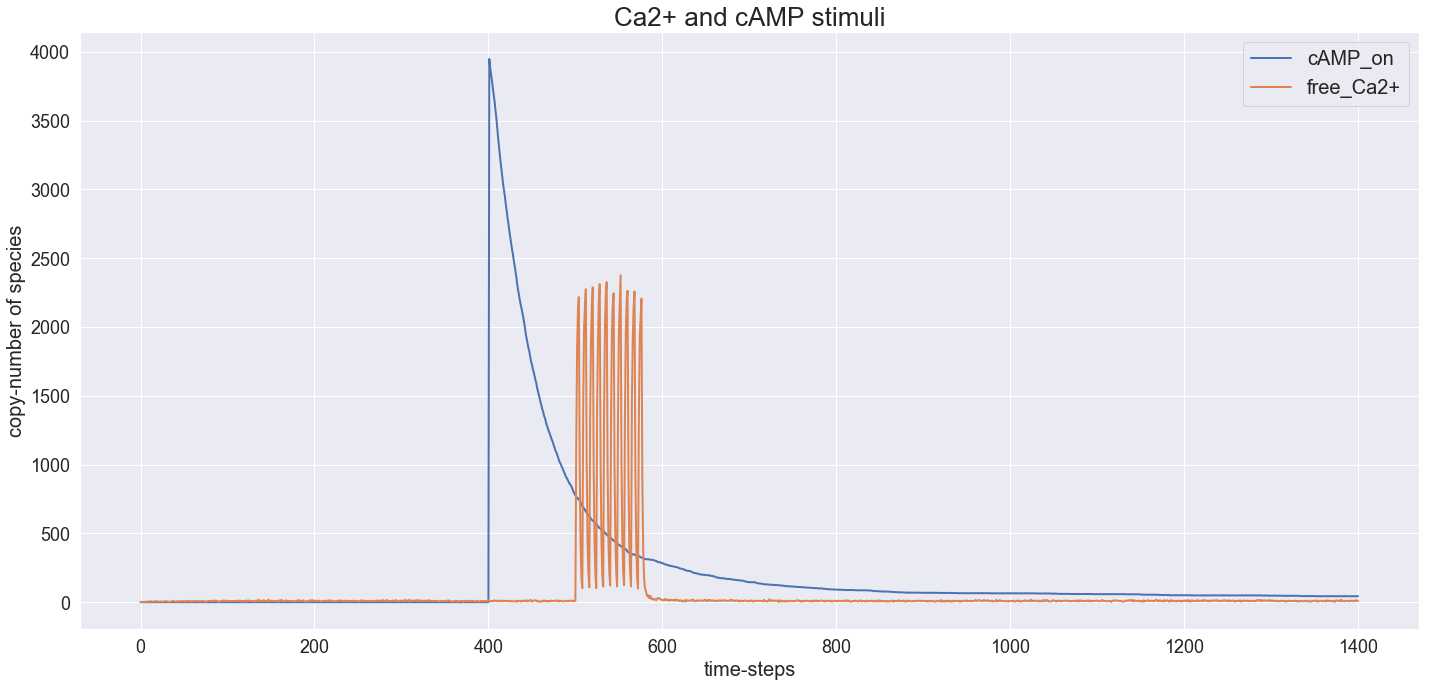

In [86]:
f = os.path.join(rb_wt, "models", "threeBindingSites_DARPP", "out", "wildType_ca-15_1.7_caStim-rateBased.out")
labels, arr = bt.timeseries_2_array(f)
df = pd.DataFrame(arr, columns=labels)

df.plot_df(df[df.columns[:2]], 
            "Ca2+ and cAMP stimuli", 
            figfilename=pathout + "/ca_camp_stimuli.png" )